### Masive Data Lab Activities

Description : Read and Cleaning Data
File        : neo_price.csv 
Name        : Yudi Aditya

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Bitcoin Cash Price

#### 1. Reading Data

In [2]:
# Read Bitcoin Cash Price
df1 = pd.read_csv('../data/raw/cryptocurrencypricehistory/neo_price.csv', parse_dates = ['Date'])
df1.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,21.88,23.85,18.93,22.80,"91,402,300","1,093,860,000"
1,2017-09-04,30.44,30.44,17.40,21.83,"189,917,000","1,522,090,000"
2,2017-09-03,31.77,32.65,28.58,30.32,"43,232,300","1,588,690,000"
3,2017-09-02,31.69,34.81,28.55,31.72,"92,722,600","1,584,390,000"
4,2017-09-01,33.17,33.57,28.87,32.01,"75,418,900","1,658,680,000"


In [3]:
type(df1.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
# Set Date as it's index
df1.set_index('Date', inplace = True )

In [5]:
# Get General Information regarding data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-09-05 to 2016-09-09
Data columns (total 6 columns):
Open          362 non-null float64
High          362 non-null float64
Low           362 non-null float64
Close         362 non-null float64
Volume        362 non-null object
Market Cap    362 non-null object
dtypes: float64(4), object(2)
memory usage: 19.8+ KB


- The data frame has 362 entries and 6 columns. 
- All columns has 362 elements, probably there's no missing data. To make it sure, We'll see for this
- Volume and market cap's data type are an object, it should be number.

In [6]:
# Replace missing data as NaN
df1.replace('-', np.nan,inplace=True)
# Count missing data
df1.isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
Market Cap    47
dtype: int64

#### 2. Cleaning Data Part (Deal with Wrong Format)

Problem :
- Some data has different format, therefore Volume recognize as a string, not a number.
- There is null data in Market Cap

Solution:
- Convert to float number
- Using interpolation to fill the missing data

In [7]:
print('Volume Data Type :', type(df1.Volume[0]))
print('Market Cap Data Type :', type(df1['Market Cap'][0]))

Volume Data Type : <class 'str'>
Market Cap Data Type : <class 'str'>


In [8]:
#convert data to number
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df1.Volume = df1.Volume.apply(convert_to_number)
df1['Market Cap'] = df1['Market Cap'].apply(convert_to_number)

df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-09-05 to 2016-09-09
Data columns (total 6 columns):
Open          362 non-null float64
High          362 non-null float64
Low           362 non-null float64
Close         362 non-null float64
Volume        362 non-null int64
Market Cap    315 non-null float64
dtypes: float64(5), int64(1)
memory usage: 29.8 KB


In [9]:
df1.describe()

,Open,High,Low,Close,Volume,Market Cap
count,362.000000,362.000000,362.000000,362.000000,3.620000e+02,3.150000e+02
mean,4.172486,4.562649,3.760576,4.233630,1.910023e+07,2.380155e+08
std,9.946756,10.752224,8.971467,9.990614,5.516568e+07,5.269704e+08
min,0.080197,0.085211,0.072287,0.080181,1.560000e+02,5.292100e+06
25%,0.139660,0.146120,0.132966,0.139955,2.075275e+04,6.824825e+06
50%,0.189495,0.196152,0.179913,0.189814,1.633035e+05,9.234250e+06
75%,1.355000,1.542500,1.242500,1.357500,7.408840e+06,2.205580e+08
max,47.630000,52.630000,44.790000,47.490000,4.486540e+08,2.381360e+09


#### 3. Cleaning Data 2 (Deal with Missing Data)

In [10]:
df1.isna().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
Market Cap    47
dtype: int64

In [11]:
#new_df is the data with non NaN value
new_df = df1[np.isfinite(df1['Market Cap'])]
new_df.tail()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2016-10-30,0.172946,0.183820,0.170264,0.181026,377793,8647300.0
2016-10-29,0.151237,0.176248,0.151237,0.170166,714101,7561850.0
2016-10-28,0.127447,0.159842,0.123780,0.151552,545958,6372350.0
2016-10-27,0.129608,0.140409,0.124055,0.127426,169528,6480400.0
2016-10-26,0.135700,0.169630,0.121312,0.129615,494772,6785000.0


In [12]:
# Lets see the correlation between each column
correlation = new_df.corr(method="pearson")
correlation

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.992477,0.995023,0.990855,0.747036,1.000000
High,0.992477,1.000000,0.991783,0.998147,0.798907,0.992478
Low,0.995023,0.991783,1.000000,0.993623,0.728139,0.995025
Close,0.990855,0.998147,0.993623,1.000000,0.784274,0.990857
Volume,0.747036,0.798907,0.728139,0.784274,1.000000,0.747026
Market Cap,1.000000,0.992478,0.995025,0.990857,0.747026,1.000000


In the data frame above, we can inferred that Market Cap has a strong relationship with Low.

Let's plot data between Market Cap and other variable, then see the relation between the data

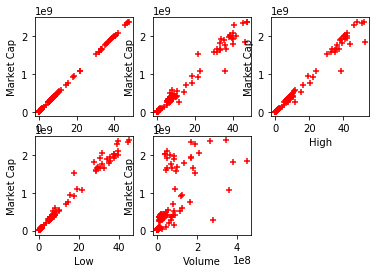

In [13]:
import matplotlib.pyplot as plt
def plot_data(xdata,ydata,xlabel):
    plt.scatter(xdata,ydata,marker='+',color='red')
    plt.ylabel('Market Cap')
    plt.xlabel(xlabel)
        
plt.subplot(2,3,1)
plot_data(new_df.Open, new_df['Market Cap'],'Open')
plt.subplot(2,3,2)
plot_data(new_df.Close, new_df['Market Cap'],'Close')
plt.subplot(2,3,3)
plot_data(new_df.High, new_df['Market Cap'],'High')
plt.subplot(2,3,4)
plot_data(new_df.Low, new_df['Market Cap'],'Low')
plt.subplot(2,3,5)
plot_data(new_df.Volume, new_df['Market Cap'],'Volume')

In [14]:
from sklearn import linear_model

model    = linear_model.LinearRegression()
x        = new_df[['Low']]
y        = new_df['Market Cap']

In [15]:
# train data using linear regression 
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
# Model Score
model.score(x, y)

0.9900743767935667

In [17]:
# Fill Missing Data Using linear model prediction 
# and Assign it to new column
x = df1[['Low']]
y = model.predict(x) 
df1['Market Cap Predict'] = y.astype('int64')
df1[df1['Market Cap'].isnull()].head()

,Open,High,Low,Close,Volume,Market Cap,Market Cap Predict
Date,,,,,,,
2016-10-25,0.093621,0.322439,0.092699,0.135712,365986,NaN,6485487
2016-10-24,0.081000,0.100103,0.076476,0.093762,522611,NaN,5590641
2016-10-23,0.081487,0.085211,0.076681,0.082726,107073,NaN,5601948
2016-10-22,0.080197,0.096001,0.080013,0.081484,293121,NaN,5785739
2016-10-21,0.092487,0.093918,0.072287,0.080181,269793,NaN,5359579


#### 4. Data Visualization

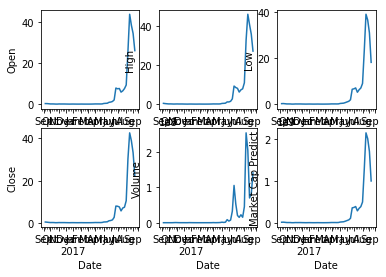

In [18]:
# Visualization the average of Open based on time (Week)
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df1.Open.resample('W').mean().plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df1.High.resample('W').mean().plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df1.Low.resample('W').mean().plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df1.Close.resample('W').mean().plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df1['Volume'].resample('W').mean().plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap Predict')
df1['Market Cap Predict'].resample('W').mean().plot()